In [20]:
import pandas as pd

Menampilkan 5 baris pertama dan terakhir dari dataset

In [21]:
df = pd.read_csv ('sakitjantungwak.csv')
print(df)

      id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  False   

              restecg  thal

Informasi tentang dataset

In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None


Cek nilai missing

In [23]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


dan outlier

In [24]:
import numpy as np
df_numeric = df.select_dtypes(include=[np.number])

In [25]:
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

outliers = df_numeric[(df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))]
print("Outliers:\n", outliers)

Outliers:
      id  age  trestbps  chol  thalch  oldpeak   ca  num
0   NaN  NaN       NaN   NaN     NaN      NaN  NaN  NaN
1   NaN  NaN       NaN   NaN     NaN      NaN  3.0  NaN
2   NaN  NaN       NaN   NaN     NaN      NaN  NaN  NaN
3   NaN  NaN       NaN   NaN     NaN      NaN  NaN  NaN
4   NaN  NaN       NaN   NaN     NaN      NaN  NaN  NaN
..   ..  ...       ...   ...     ...      ...  ...  ...
915 NaN  NaN       NaN   NaN     NaN      NaN  NaN  NaN
916 NaN  NaN       NaN   NaN     NaN      NaN  NaN  NaN
917 NaN  NaN       NaN   NaN     NaN      NaN  NaN  NaN
918 NaN  NaN       NaN   NaN     NaN      NaN  NaN  NaN
919 NaN  NaN       NaN   NaN     NaN      NaN  NaN  NaN

[920 rows x 8 columns]


Hitung mean, median, mode, standar deviasi, variansi, skewness, dan kurtosis untuk kolom numerik

In [26]:
mean = df_numeric.mean()
median = df_numeric.median()
mode = df_numeric.mode().iloc[0]
std_dev = df_numeric.std()
variance = df_numeric.var()
skewness = df_numeric.skew()
kurtosis = df_numeric.kurtosis()

print(f"Mean:\n{mean}\n")
print(f"Median:\n{median}\n")
print(f"Mode:\n{mode}\n")
print(f"Standard Deviation:\n{std_dev}\n")
print(f"Variance:\n{variance}\n")
print(f"Skewness:\n{skewness}\n")
print(f"Kurtosis:\n{kurtosis}\n")

Mean:
id          460.500000
age          53.510870
trestbps    132.132404
chol        199.130337
thalch      137.545665
oldpeak       0.878788
ca            0.676375
num           0.995652
dtype: float64

Median:
id          460.5
age          54.0
trestbps    130.0
chol        223.0
thalch      140.0
oldpeak       0.5
ca            0.0
num           1.0
dtype: float64

Mode:
id            1.0
age          54.0
trestbps    120.0
chol          0.0
thalch      150.0
oldpeak       0.0
ca            0.0
num           0.0
Name: 0, dtype: float64

Standard Deviation:
id          265.725422
age           9.424685
trestbps     19.066070
chol        110.780810
thalch       25.926276
oldpeak       1.091226
ca            0.935653
num           1.142693
dtype: float64

Variance:
id          70610.000000
age            88.824691
trestbps      363.515007
chol        12272.387943
thalch        672.171813
oldpeak         1.190775
ca              0.875447
num             1.305748
dtype: float64

Skewn

Hitung korelasi antar variabel numerik.

In [27]:
correlation = df_numeric.corr()
print("Correlation Matrix:\n", correlation)

Correlation Matrix:
                 id       age  trestbps      chol    thalch   oldpeak  \
id        1.000000  0.239301  0.052924 -0.376936 -0.466427  0.049930   
age       0.239301  1.000000  0.244253 -0.086234 -0.365778  0.258243   
trestbps  0.052924  0.244253  1.000000  0.092853 -0.104899  0.161908   
chol     -0.376936 -0.086234  0.092853  1.000000  0.236121  0.047734   
thalch   -0.466427 -0.365778 -0.104899  0.236121  1.000000 -0.151174   
oldpeak   0.049930  0.258243  0.161908  0.047734 -0.151174  1.000000   
ca        0.061433  0.370416  0.093705  0.051606 -0.264094  0.281817   
num       0.273552  0.339596  0.122291 -0.231547 -0.366265  0.443084   

                ca       num  
id        0.061433  0.273552  
age       0.370416  0.339596  
trestbps  0.093705  0.122291  
chol      0.051606 -0.231547  
thalch   -0.264094 -0.366265  
oldpeak   0.281817  0.443084  
ca        1.000000  0.516216  
num       0.516216  1.000000  


Buat histogram dan box plot untuk setiap variabel numerik.

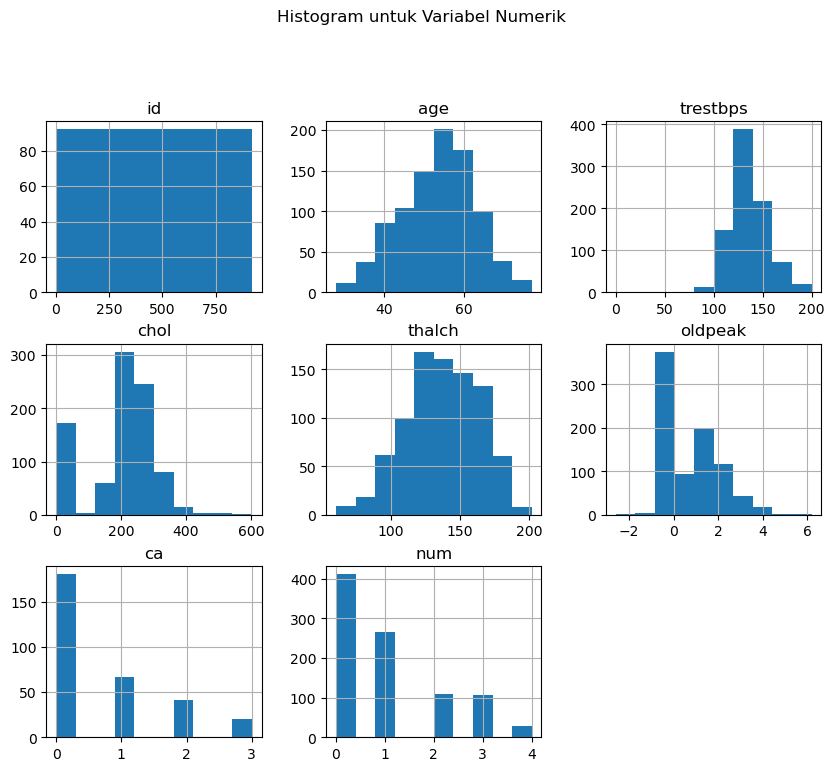

In [28]:
import matplotlib.pyplot as plt
df_numeric.hist(figsize=(10, 8))
plt.suptitle('Histogram untuk Variabel Numerik', y=1.02)
plt.show()

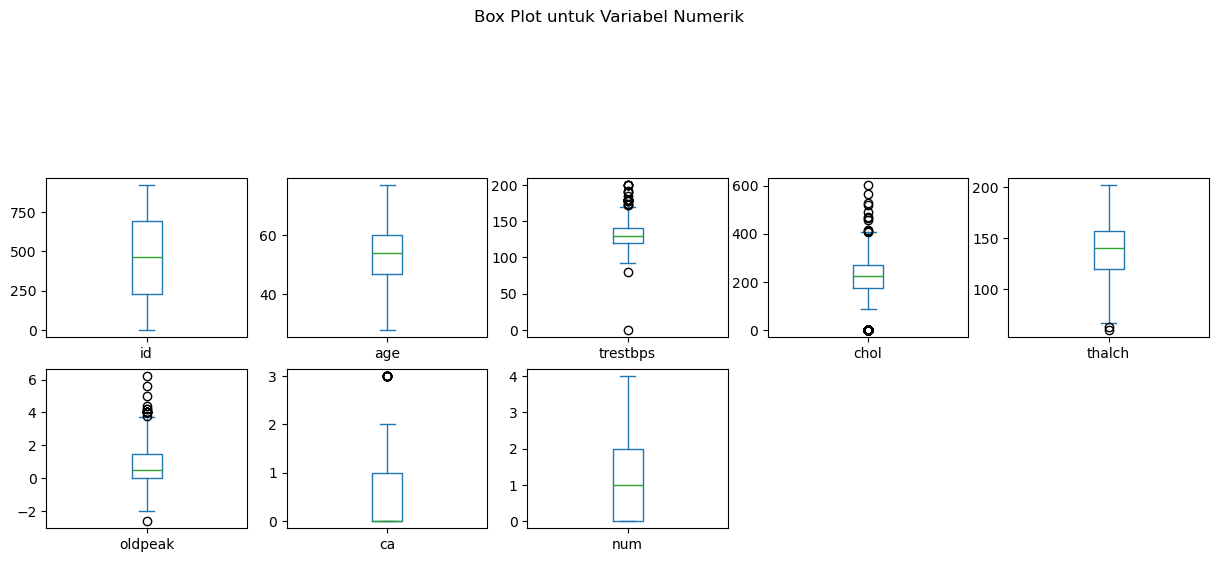

In [29]:
df_numeric.plot(kind='box', subplots=True, layout=(5,5), figsize=(15, 12))
plt.suptitle('Box Plot untuk Variabel Numerik', y=1.02)
plt.show()

Buat scatter plot untuk pasangan variabel yang memiliki korelasi tinggi.

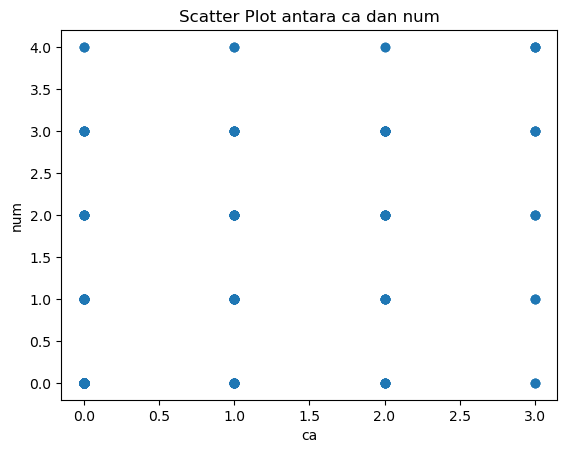

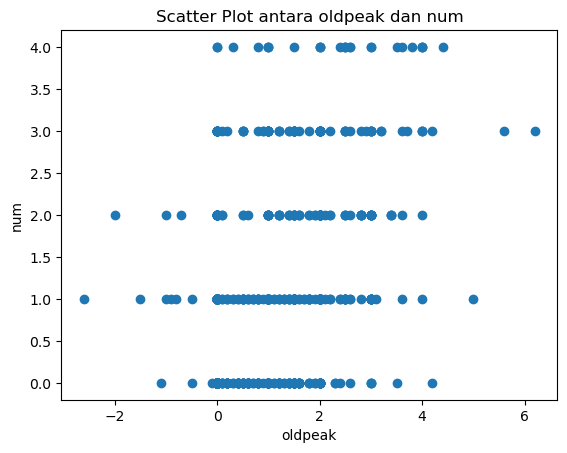

In [30]:
high_corr_pairs = correlation.unstack().sort_values(kind="quicksort", ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs != 1].drop_duplicates()
for i in range(2):
    var1 = high_corr_pairs.index[i][0]
    var2 = high_corr_pairs.index[i][1]
    plt.scatter(df[var1], df[var2])
    plt.title(f'Scatter Plot antara {var1} dan {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()

